In [1]:
!pip install networkx

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [1]:
import networkx as nx
from queue import Queue
import numba
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def save_graph(G, filename):
    f = open(filename, "w")
    
    offsets = []
    vertices = []

    offsets.append(0)

    offset = 0
    for node in G.nodes():
        V = G.neighbors(node)
        for v in V:
            vertices.append(v)
            offset += 1
        offsets.append(offset)
    
    num_nodes = len(G.nodes())
    num_edges = len(G.edges())
    
    print(num_nodes, num_edges, file=f)
    for off in offsets:
        print(off, end=' ', file=f)
    print(file=f)
    for v in vertices:
        print(v, end=' ', file=f)
    
    f.close()

In [3]:
base_path = "/home/hpyan/DataVisualization/BetweennessCentrality/"

In [38]:
# 边不变，节点变化
num_nodes_list = range(1000, 30001, 1000)
num_edges = 1000

for num_nodes in tqdm(num_nodes_list):
    G = nx.random_graphs.gnm_random_graph(num_nodes, num_edges)
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    save_graph(G, graph_path)

100%|██████████| 30/30 [00:01<00:00, 17.41it/s]


In [39]:
def test(program, graph_path):
    graph_bc_result = graph_path[:-1] + "bc"
    time_cost  = !./BetweennessCentrality/BC_$program $graph_path $graph_bc_result
    time_cost = float(time_cost[0]) / 1000.0
    return time_cost

In [40]:
test_result = {}

In [41]:
# 串行版本

time_cost_list = []

for num_nodes in tqdm(num_nodes_list):
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    time_cost = test("serial", graph_path)
    time_cost_list.append(time_cost)

test_result["serial"] = time_cost_list

100%|██████████| 30/30 [00:26<00:00,  2.06s/it]


In [42]:
# 点并行

time_cost_list = []

for num_nodes in tqdm(num_nodes_list):
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    time_cost = test("parallel_vertex", graph_path)
    time_cost_list.append(time_cost)

test_result["parallel_vertex"] = time_cost_list

100%|██████████| 30/30 [00:29<00:00,  1.45s/it]


In [43]:
# 边并行
time_cost_list = []

for num_nodes in tqdm(num_nodes_list):
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    time_cost = test("parallel_edge", graph_path)
    time_cost_list.append(time_cost)

test_result["parallel_edge"] = time_cost_list

100%|██████████| 30/30 [00:27<00:00,  1.60s/it]


In [44]:
# work
time_cost_list = []

for num_nodes in tqdm(num_nodes_list):
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    time_cost = test("parallel_work", graph_path)
    time_cost_list.append(time_cost)

test_result["parallel_work"] = time_cost_list

100%|██████████| 30/30 [00:24<00:00,  1.05it/s]


In [45]:
# work coarse

time_cost_list = []

for num_nodes in tqdm(num_nodes_list):
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    time_cost = test("parallel_work_coarse", graph_path)
    time_cost_list.append(time_cost)

test_result["parallel_work_coarse"] = time_cost_list

100%|██████████| 30/30 [00:23<00:00,  1.21it/s]


Text(0, 0.5, 'time(second)')

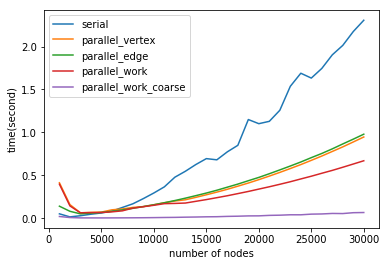

In [54]:
for name in test_result:
    plt.plot(num_nodes_list, test_result[name], label=name)
plt.legend()
plt.xlabel("number of nodes")
plt.ylabel("time(second)")

In [47]:
test_result2 = {}
test_result2["串行"] = test_result['serial']
test_result2["节点并行"] = test_result['parallel_vertex']
test_result2["边并行"] = test_result['parallel_edge']
test_result2["高效并行"] = test_result['parallel_work']
test_result2["混合法"] = test_result['parallel_work_coarse']

Text(0.5, 0, '时间(秒)')

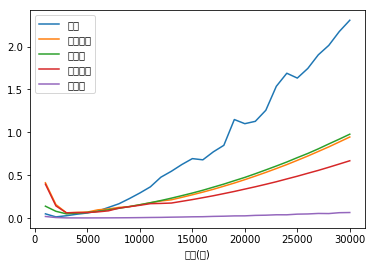

In [51]:
for name in test_result2:
    plt.plot(num_nodes_list, test_result2[name], label=name)
plt.legend()


In [18]:
# 边不变，节点变化
num_nodes_list = range(1000, 30001, 1000)
num_edges = 10

for num_nodes in tqdm(num_nodes_list):
    G = nx.random_graphs.gnm_random_graph(num_nodes, num_edges)
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    save_graph(G, graph_path)

100%|██████████| 30/30 [00:01<00:00, 15.56it/s]


In [19]:
time_cost_list = []

for num_nodes in tqdm(num_nodes_list):
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    time_cost = test("serial", graph_path)
    time_cost_list.append(time_cost)

100%|██████████| 30/30 [00:27<00:00,  2.09s/it]


Text(0, 0.5, 'time(second)')

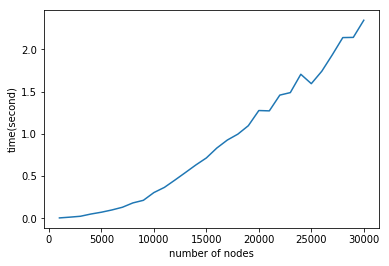

In [25]:
plt.plot(num_nodes_list, time_cost_list)
plt.xlabel("number of nodes")
plt.ylabel("time(second)")

In [24]:

num_nodes = 2000
num_edges_list = range(100, 3001, 100)

for num_edges in tqdm(num_edges_list):
    G = nx.random_graphs.gnm_random_graph(num_nodes, num_edges)
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    save_graph(G, graph_path)

100%|██████████| 30/30 [00:00<00:00, 44.51it/s]


In [28]:
time_cost_list = []

for num_edges in tqdm(num_edges_list):
    graph_path = base_path + "testcase/{}_{}.g".format(num_nodes, num_edges)
    time_cost = test("serial", graph_path)
    time_cost_list.append(time_cost)

100%|██████████| 30/30 [00:04<00:00,  3.24it/s]


Text(0, 0.5, 'time(second)')

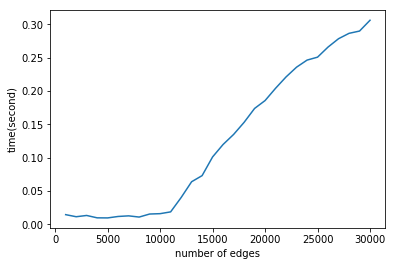

In [29]:
plt.plot(num_nodes_list, time_cost_list)
plt.xlabel("number of edges")
plt.ylabel("time(second)")